In [80]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(122)

In [81]:
n, m = 10, 20
colors = [np.random.choice(["red", "blue"], n, replace=True) for _ in range(0, 4)]

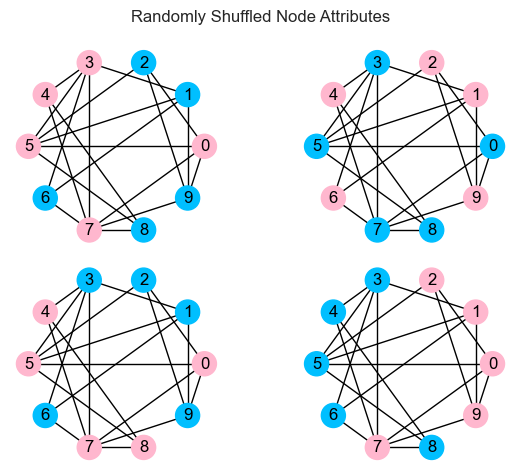

In [82]:
G = nx.gnm_random_graph(n, m)
positions = [(4*np.cos(i * 2 * np.pi/n), 4*np.sin(i * 2 * np.pi/n)) for i in range (n)]
pos = dict(zip(list(G.nodes), positions))
choices = ["#FFB7CE"] * (n//2) + ["#00BFFF"] * (n//2)
colors = [np.random.choice(choices, n, replace=False) for _ in range(0, 252)]
fig, axs = plt.subplots(2, 2, sharex="all", sharey="all")

nx.draw(G, pos=pos, node_color=colors[0], with_labels=True, ax=axs[0, 0])
nx.draw(G, pos=pos, node_color=colors[1], with_labels=True, ax=axs[0, 1])
nx.draw(G, pos=pos, node_color=colors[2], with_labels=True, ax=axs[1, 0])
nx.draw(G, pos=pos, node_color=colors[3], with_labels=True, ax=axs[1, 1])
for i in range(2): 
    for j in range(2): 
        axs[i, j].set_aspect("equal")
fig.suptitle("Randomly Shuffled Node Attributes")
fig.tight_layout()
plt.savefig("randomly-shuffled-colors.png")

In [83]:
with open(r"data\null_distribution_celegans.csv", "r") as file:
    dist = [float(line.strip()) for line in file.readlines()]

In [84]:
dist

[1.6917695578615517,
 5.634188116774024,
 0.42104174771306374,
 2.9615545790149262,
 3.0584638587884787,
 2.0019916812566296,
 4.225335412052696,
 8.26456912357943,
 6.299014744284549,
 6.525683198303034,
 3.111065901804795,
 2.7489797773968965,
 1.0636119213007178,
 5.493396212460251,
 4.402554849304979,
 0.7347584953314984,
 0.5707134233823471,
 5.832198208908866,
 0.6360728775084608,
 36.44686028677247,
 0.6748292732876363,
 2.6540159906675806,
 3.734555373938867,
 14.110082455417363,
 0.3364822872146371,
 1.378567657990673,
 5.385200341962183,
 0.8337437760645021,
 0.7518375429591844,
 22.27744105665241,
 0.7170093262031687,
 2.8071561639562126,
 1.1552298402253722,
 0.9721193342786009,
 1.0584824598385296,
 0.9273546084453158,
 2.0041853471199516,
 2.2426707852170473,
 2.9188858434922964,
 1.3952351938049017,
 5.228106883040853,
 5.378955699268356,
 0.7960174966515584,
 3.959728840054591,
 0.3701436836251716,
 0.40839950139726633,
 2.2188474036366306,
 0.9506630820115184,
 3.59116

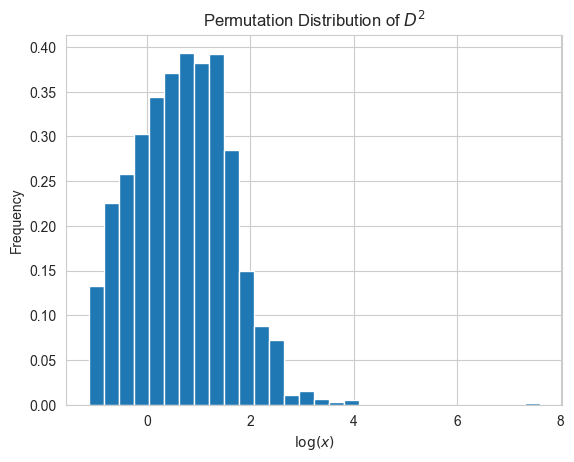

In [85]:
plt.hist(np.log(dist), bins=30, density=True)
plt.title(r"Permutation Distribution of $D^2$")
plt.xlabel(r"$\log(x)$")
plt.ylabel(r"Frequency")
plt.savefig("test_statistic_celegans.png")

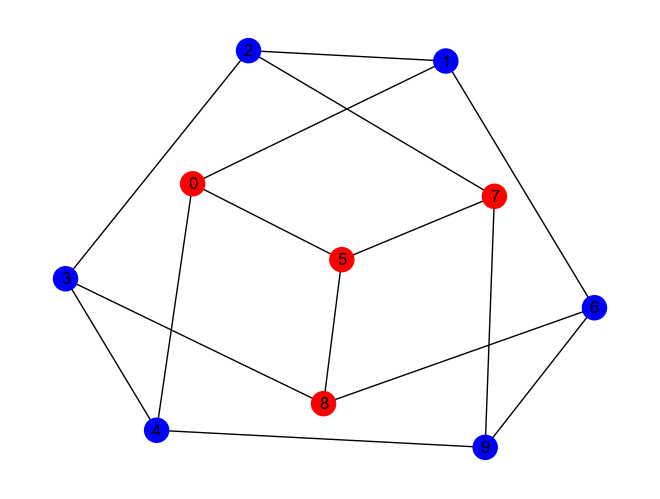

In [86]:
G = nx.petersen_graph()

plt.clf()
colors = np.random.choice(["red", "blue"], 10, replace=True)
nx.draw(G, node_color=list(colors), with_labels=True)

In [87]:
from validation_script import *

run 3 times

In [88]:
P, c = generate_prob_matrix(15, 2, 0.5, -0.5, 0)
G = generate_SBM_static(P)

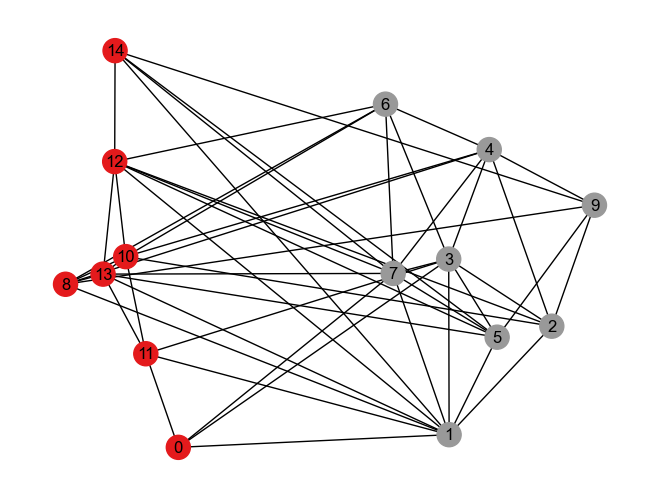

In [89]:
pos = {}

# 2. Get the unique partitions/colors from 'c'
unique_colors = list(set(c))

# 3. Calculate positions for each cluster
for idx, color in enumerate(unique_colors):
    # Find all node IDs belonging to the current color
    # Assuming node IDs in G are integers 0-14 matching the indices in 'c'
    cluster_nodes = [node_id for node_id, col in enumerate(c) if col == color]
    
    # Create a subgraph of just these nodes
    subgraph = G.subgraph(cluster_nodes)
    
    # Generate a spring layout just for this cluster
    # We space them out horizontally by setting the center to (idx * 3, 0)
    # Cluster 0 will center at (0, 0), Cluster 1 will center at (3, 0)
    cluster_pos = nx.spring_layout(subgraph, center=(idx * 3, 0))
    
    # Update the master position dictionary
    pos.update(cluster_pos)

# 4. Draw the graph using the custom positions and color map
# We cast the string-integers in 'c' to actual ints for the colormap
node_colors = [int(color) for color in c]
nx.draw(G, pos=pos, node_color=node_colors, with_labels=True, cmap="Set1")

(0.0,
 9139.621619864405,
 array([3.20389137e+00, 3.06742904e+00, 1.60003690e+00, 2.78237413e+00,
        1.99115946e+00, 6.93991915e-01, 7.55695630e+00, 1.97591196e+00,
        9.38743053e-02, 4.64196989e+00, 2.92538209e+00, 1.47009131e+01,
        1.97591196e+00, 3.74642086e+00, 6.19029955e+00, 3.99947025e+00,
        7.49544217e-01, 4.00279205e-01, 1.00521414e+01, 3.23176998e-01,
        2.84968734e+00, 5.75120318e+00, 1.40328413e+00, 1.43331794e+00,
        2.23224732e+00, 7.64743666e+00, 1.17406624e+00, 1.17406624e+00,
        1.86039284e+00, 2.90816980e+00, 1.38189999e+00, 7.03311678e+00,
        1.53829992e+00, 1.40328413e+00, 3.12850332e+00, 9.00990788e-01,
        5.47257468e+00, 1.45953116e+00, 1.45953116e+00, 3.03950615e+00,
        1.83566334e+00, 2.25742097e+00, 9.38743053e-02, 1.48871126e+01,
        2.35201243e+00, 2.78237413e+00, 2.90896235e+00, 3.13058670e+00,
        1.60003690e+00, 3.46396665e+01, 7.49544217e-01, 4.61757961e+00,
        1.45953116e+00, 3.60783885e+00

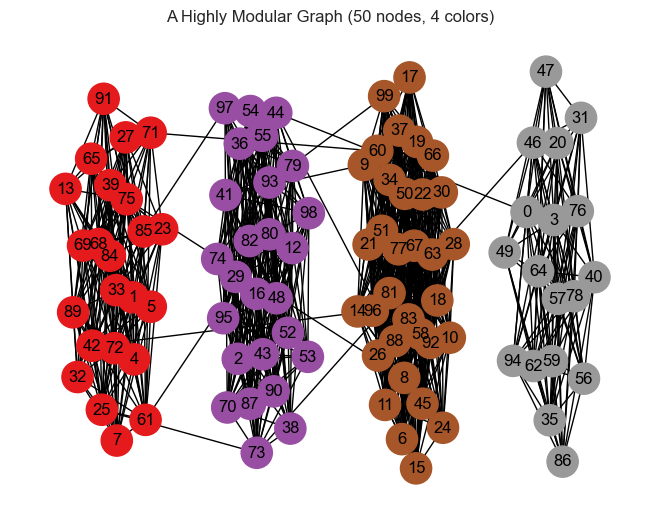

In [90]:
import networkx as nx

# [Your existing code here]
P, c = generate_prob_matrix(100, 4, 1, -5, 0)
G = generate_SBM_static(P)

pos = {}
unique_colors = list(set(c))

# 1. Grab only the nodes that actually survived into G
existing_nodes = list(G.nodes())

for idx, color in enumerate(unique_colors):
    # 2. Filter cluster nodes based ONLY on existing nodes. 
    # This assumes the node IDs in G correspond to their original index in 'c'
    cluster_nodes = [node for node in existing_nodes if c[node] == color]
    
    subgraph = G.subgraph(cluster_nodes)
    cluster_pos = nx.spring_layout(subgraph, center=(idx * 3, 0))
    pos.update(cluster_pos)

# 3. Build the node_color list dynamically in the exact order of G.nodes()
node_colors = [int(c[node]) for node in G.nodes()]

# 4. Draw the graph
plt.clf()
nx.draw(G, pos=pos, node_color=node_colors, node_size=505, with_labels=True, cmap="Set1")
plt.title("A Highly Modular Graph (50 nodes, 4 colors)")
plt.savefig("SBM_4color.png")
dist2 = stats_engine(nk.nxadapter.nx2nk(G), [str(_) for _ in c], iters=1000)
dist2

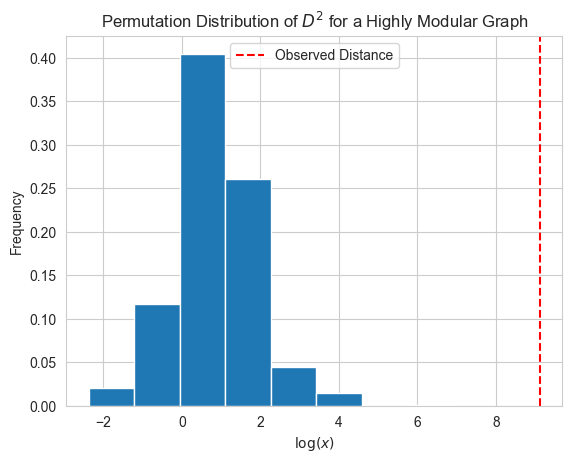

In [91]:
plt.clf()
plt.hist(np.log(dist2[2]), bins=8, density=True)
plt.title(r"Permutation Distribution of $D^2$ for a Highly Modular Graph")
plt.xlabel(r"$\log(x)$")
plt.ylabel(r"Frequency")
plt.axvline(x=np.log(dist2[1]), color='red', linestyle='--', label='Observed Distance')
plt.legend()
plt.savefig("SBM_perm_dist.png")

(0.807,
 0.4887159978515576,
 array([1.19532595e+00, 6.91941281e-02, 8.60445604e-01, 9.38034132e-02,
        3.02237227e-01, 8.17944408e-01, 3.98742153e+00, 2.50723051e+00,
        1.38729814e+00, 4.35474754e+00, 1.54632056e+00, 1.48737910e+00,
        3.45129067e-01, 1.70178933e-01, 1.11473051e+00, 1.92257671e+00,
        2.44279603e-01, 4.15509691e+00, 1.75093924e+00, 3.76974954e-01,
        1.59453126e-01, 6.45368293e-01, 1.51337473e+00, 1.43029883e+00,
        5.48689667e+00, 2.84373335e+00, 1.75093924e+00, 8.55747176e-01,
        8.24503935e-01, 6.15172576e+00, 8.12262145e-01, 1.39030751e+00,
        1.75213845e+00, 4.15596838e+00, 2.39070337e-01, 1.26369071e+00,
        2.00139561e+00, 1.90173964e+00, 8.28290825e-01, 1.43029883e+00,
        4.41186618e+00, 3.02237227e-01, 3.88724569e-01, 4.61736588e-01,
        1.57284996e+00, 2.64339480e+00, 1.75213845e+00, 2.97642472e+00,
        1.15946430e+00, 1.56848493e-01, 7.80781799e+00, 2.44279603e-01,
        4.61736588e-01, 8.04888535e

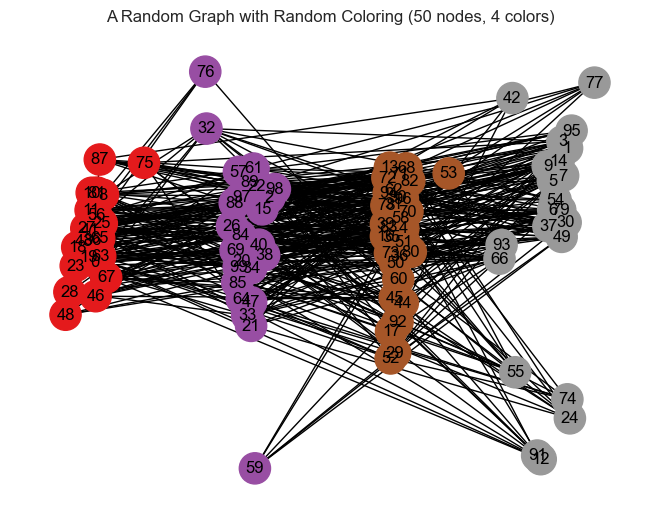

In [92]:
import networkx as nx

# [Your existing code here]
G = nx.gnm_random_graph(100, 500)
P, c = generate_prob_matrix(100, 4, 0, 0, 0)
pos = {}
unique_colors = list(set(c))

# 1. Grab only the nodes that actually survived into G
existing_nodes = list(G.nodes())

for idx, color in enumerate(unique_colors):
    # 2. Filter cluster nodes based ONLY on existing nodes. 
    # This assumes the node IDs in G correspond to their original index in 'c'
    cluster_nodes = [node for node in existing_nodes if c[node] == color]
    
    subgraph = G.subgraph(cluster_nodes)
    cluster_pos = nx.spring_layout(subgraph, center=(idx * 3, 0))
    pos.update(cluster_pos)

# 3. Build the node_color list dynamically in the exact order of G.nodes()
node_colors = [int(c[node]) for node in G.nodes()]

# 4. Draw the graph
plt.clf()
nx.draw(G, pos=pos, node_color=node_colors, node_size=505, with_labels=True, cmap="Set1")
plt.title("A Random Graph with Random Coloring (50 nodes, 4 colors)")
plt.savefig("random_4color.png")
dist2 = stats_engine(nk.nxadapter.nx2nk(G), [str(_) for _ in c], iters=1000)
dist2


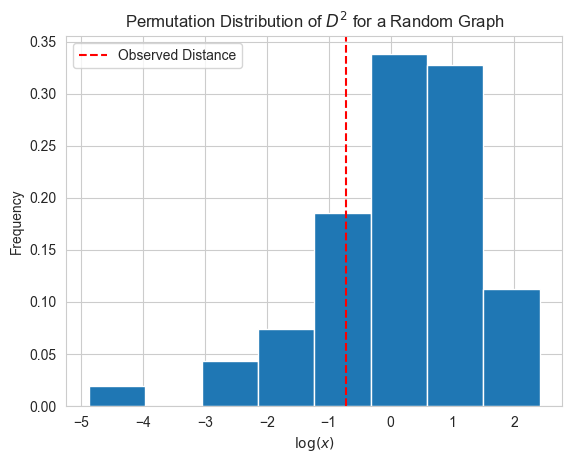

In [93]:
plt.clf()
plt.hist(np.log(dist2[2]), bins=8, density=True)
plt.title(r"Permutation Distribution of $D^2$ for a Random Graph")
plt.xlabel(r"$\log(x)$")
plt.ylabel(r"Frequency")
plt.axvline(x=np.log(dist2[1]), color='red', linestyle='--', label='Observed Distance')
plt.legend()
plt.savefig("random_perm_dist.png")

In [94]:
dist2[0]

0.807